In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import numpy as np

In [ ]:
def plot_labeled_price_by_time(df, start_time, end_time):
    """
    Vẽ biểu đồ giá Close với màu sắc theo Label (BUY, SELL, HOLD) trong khoảng thời gian cụ thể.

    Parameters:
    - df: DataFrame có các cột 'Date', 'Time', 'Close', 'Label'
    - start_time, end_time: định dạng datetime hoặc chuỗi có thể chuyển thành datetime
    """

    # Tạo bản sao và xử lý cột datetime
    df = df.copy()
    df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
    df.dropna(subset=['Datetime'], inplace=True)

    # Chuyển đổi thời gian đầu-cuối
    start_dt = pd.to_datetime(start_time)
    end_dt = pd.to_datetime(end_time)

    # Lọc dữ liệu theo thời gian
    df_sample = df[(df['Datetime'] >= start_dt) & (df['Datetime'] <= end_dt)].copy()

    if len(df_sample) < 2:
        print("Không đủ dữ liệu để vẽ.")
        return

    # Màu theo label
    color_map = {'BUY': 'blue', 'SELL': 'red', 'HOLD': 'yellow'}
    colors = df_sample['Label'].map(color_map).fillna('black')

    # Tạo LineCollection
    x = df_sample['Datetime'].values
    y = df_sample['Close'].values
    x_num = mdates.date2num(x)  # chuyển datetime sang số để vẽ

    points = np.array([x_num, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    segment_colors = colors.iloc[:-1].values

    fig, ax = plt.subplots(figsize=(14, 6))
    lc = LineCollection(segments, colors=segment_colors, linewidth=2)
    ax.add_collection(lc)

    # Thiết lập trục và tiêu đề
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(min(y), max(y))
    ax.set_title(f"Giá vàng từ {start_dt} đến {end_dt}")
    ax.set_xlabel("Thời gian")
    ax.set_ylabel("Giá Close")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    fig.autofmt_xdate()
    plt.grid(True)

    # Legend
    legend_elements = [
        Line2D([0], [0], color='blue', lw=2, label='BUY'),
        Line2D([0], [0], color='red', lw=2, label='SELL'),
        Line2D([0], [0], color='yellow', lw=2, label='HOLD')
    ]
    ax.legend(handles=legend_elements, title="Label")

    plt.show()


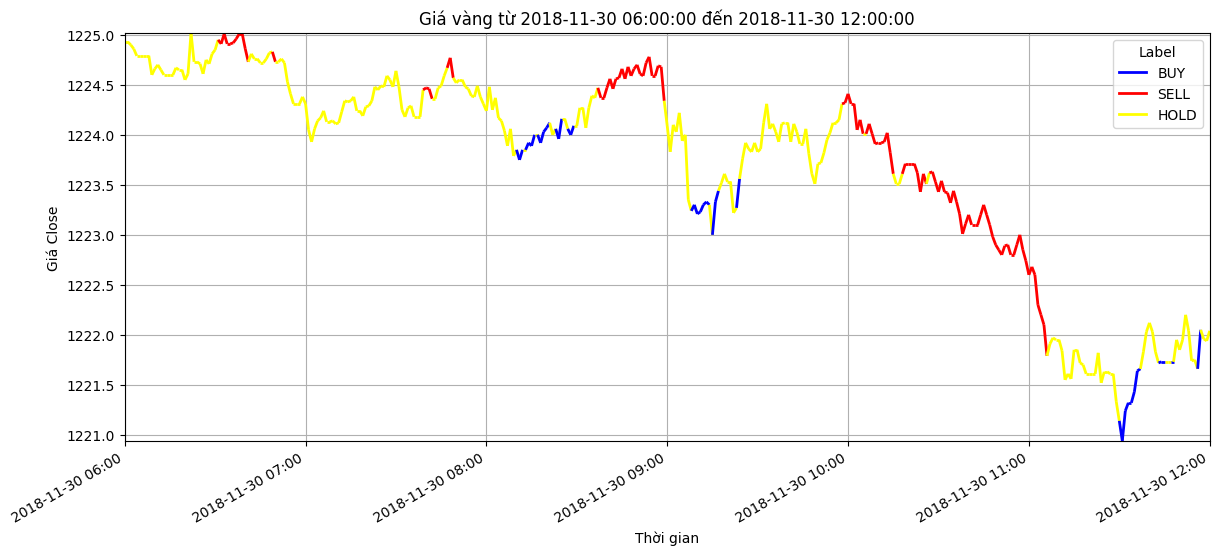

In [54]:
df = pd.read_csv('data/dynamic_labeled_train.csv')
plot_labeled_price_by_time(
    df,
    start_time='2018-11-30 06:00:00',
    end_time='2018-11-30 12:00:00'
)

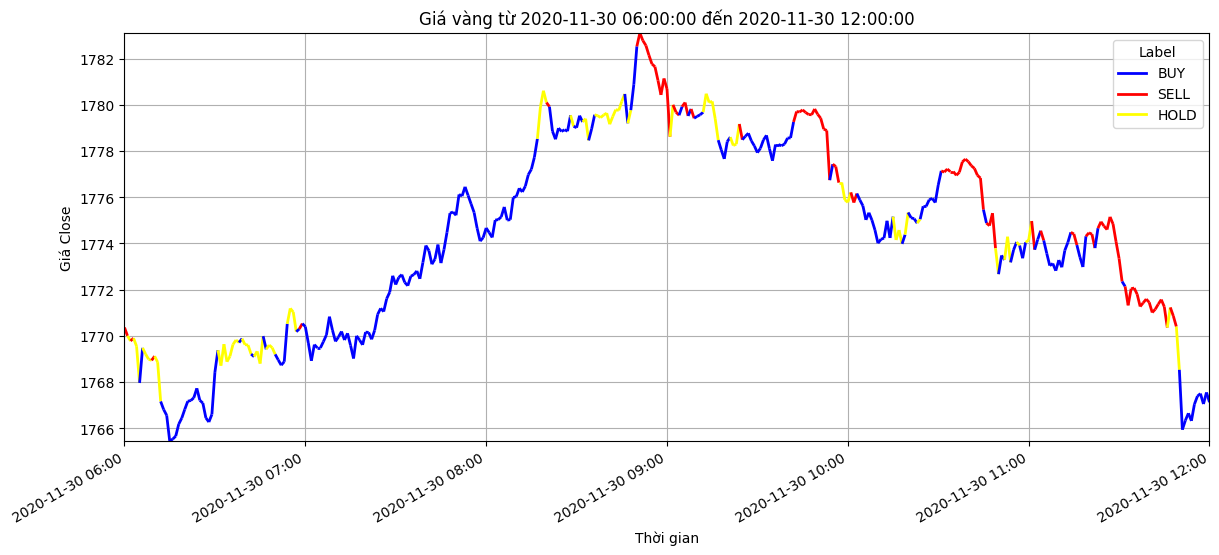

In [56]:
plot_labeled_price_by_time(
    df,
    start_time='2020-11-30 06:00:00',
    end_time='2020-11-30 12:00:00'
)

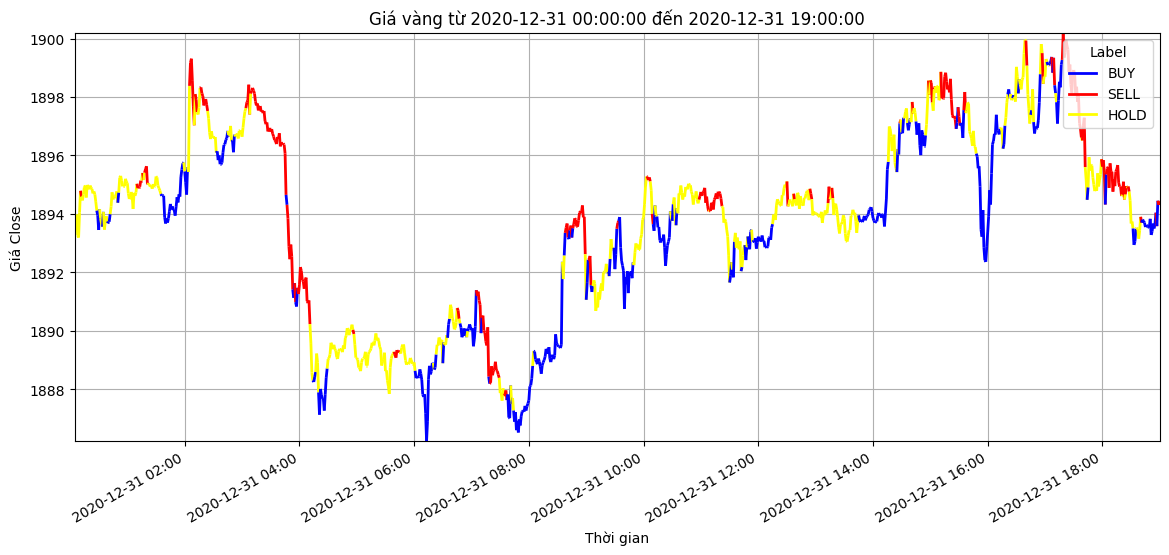

In [57]:
plot_labeled_price_by_time(
    df,
    start_time='2020-12-31 00:00:00',
    end_time='2020-12-31 19:00:00'
)